In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [2]:
df = pd.read_csv('../data/alldata.csv')

# Making a graph showing occurences
---

In [3]:
df.head()

,time,length,rubrik,author,keywords,
0,"30.03.2021, 12.32 Uhr",564,Panorama,NaN,"['Wetter', 'Ostern', 'Deutschland']",NaN
1,"01.04.2021, 20.28 Uhr",581,Wirtschaft,beb,['IWF'],NaN
2,"31.03.2021, 07.22 Uhr",749,Panorama,ala/dpa/AFP/Reuters,"['Honduras', 'Drogen', 'Drogendelikte in den U...",NaN
3,"31.03.2021, 12.38 Uhr",700,Panorama,ala/AFP/dpa,"['KZ', 'Waffen-SS', 'Holocaust', 'USA']",NaN
4,"29.03.2021, 11.47 Uhr",667,Netzwelt,mbö,"['Microsoft Windows', 'Microsoft']",NaN


In [4]:
keywords = []
amounts = []
for index, row in df.iterrows():
    if type(row["keywords"]) == float:
        continue
    for k in eval(row["keywords"]):
        if not k in keywords:
            keywords.append(k)
            amounts.append(0)
        else:
            ind = keywords.index(k)
            if type(ind) == int:
                amounts[ind] += 1

In [5]:
keywords_weighted = []
for i in range(len(keywords)):
    keywords_weighted.append([keywords[i], amounts[i]])

In [8]:
keywords_weighted = list(reversed(sorted(keywords_weighted, key=lambda x: x[1])))
#keywords_weighted = [x for x in keywords if x[1] > ]

In [9]:
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 13.7,8.27

<AxesSubplot:xlabel='0', ylabel='1'>

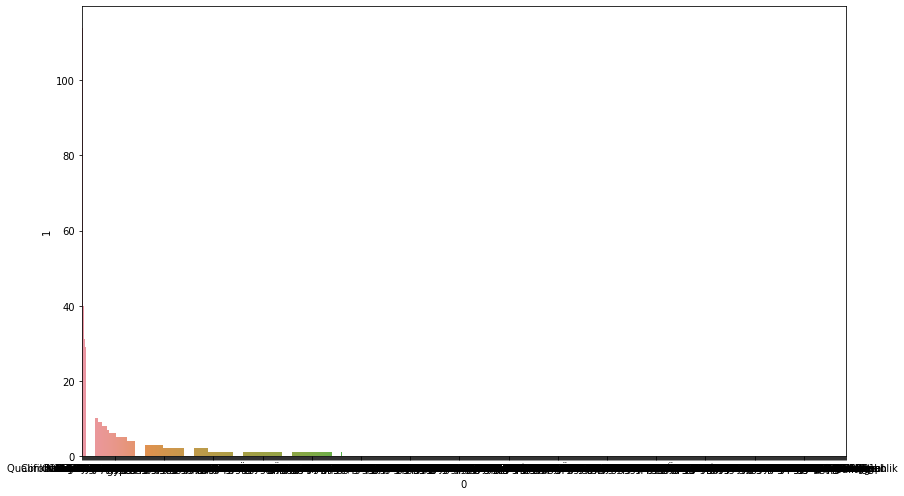

In [10]:
sns.barplot(x=0, y=1, data=pd.DataFrame.from_records(keywords_weighted))

# Network graph showing relationships
---

In [11]:
import itertools
from pyvis.network import Network
import math
from time import sleep
from tqdm.notebook import tqdm

In [12]:
keywords_relation = []
for index, row in df.iterrows():
    if type(row["keywords"]) == float:
            continue
    for e in list(itertools.combinations(eval(row["keywords"]), 2)):
        keywords_relation.append(e)

In [13]:
def get_index(li, el):
    for i, j in enumerate(li):
        if j[0] == el:
            return i
    return 100

In [16]:
# add weight to keywords_relation to scale edge
keywords_relation_weighted = []
sec = []
lnkwr = len(keywords_relation)
for ix1, i in tqdm(enumerate(keywords_relation), total=lnkwr):
    for ix2, j in enumerate(keywords_relation):
        if ix1 == ix2: 
            continue

        if not i in sec:
            if not list(reversed(i)) in sec:
                keywords_relation_weighted.append([i[0], i[1], 1])
                sec.append((i[0], i[1]))
        elif j == i:
            keywords_relation_weighted[sec.index(i)][2] += 1
        elif list(reversed(i)) == j:
            keywords_relation_weighted[sec.index(list(reversed(i)))][2] += 1
            

  0%|          | 0/2837 [00:00<?, ?it/s]

In [18]:
net = Network(height='750px', width='100%', bgcolor='#222222', font_color='white')
net.barnes_hut()
for e in keywords_relation_weighted:
    src = e[0]
    dst = e[1]
    w = e[2]

    net.add_node(src, src, title=src, size=(math.log(keywords_weighted[get_index(keywords_weighted, src)][1]+1, 1.2)*2+10))
    net.add_node(dst, dst, title=dst, size=(math.log(keywords_weighted[get_index(keywords_weighted, dst)][1]+1, 1.2)*2+10))
    net.add_edge(src, dst, value=(math.log(w+1, 1.2)*2+10))

net.show('net.html')

# Network graph showing relationships with colors
---

In [17]:
import itertools
from pyvis.network import Network
import math
from time import sleep
from tqdm.notebook import tqdm

In [27]:
keywords_relation = []
keywords_rubrik = []
for index, row in df.iterrows():
    if type(row["keywords"]) == float:
            continue
    for e in list(itertools.combinations(eval(row["keywords"]), 2)):
        keywords_relation.append(e)
        keywords_rubrik.append(row["rubrik"])

In [37]:
def get_index(li, el):
    for i, j in enumerate(li):
        if j[0] == el:
            return i
    return 100

  0%|          | 0/2837 [00:00<?, ?it/s]

In [22]:
# add weight to keywords_relation to scale edge
keywords_relation_weighted = []
sec = []
lnkwr = len(keywords_relation)
for ix1, i in tqdm(enumerate(keywords_relation), total=lnkwr):
    for ix2, j in enumerate(keywords_relation):
        if ix1 == ix2: 
            continue

        if not i in sec:
            if not list(reversed(i)) in sec:
                keywords_relation_weighted.append([i[0], i[1], 1, keywords_rubrik[ix1]])
                sec.append((i[0], i[1]))
        elif j == i:
            keywords_relation_weighted[sec.index(i)][2] += 1
        elif list(reversed(i)) == j:
            keywords_relation_weighted[sec.index(list(reversed(i)))][2] += 1

In [32]:
def rubrik_to_color(rubrik):
    if rubrik == 'Panorama':
        return '#ff5757'
    elif rubrik == 'Wirtschaft':
        return '#ffa557'
    elif rubrik == 'Netzwelt':
        return '#ffee57'
    elif rubrik == 'Kultur':
        return '#6ea60d'
    elif rubrik == 'Sport':
        return '#0ae802'
    elif rubrik == 'Mobilität':
        return '#57ff9a'
    elif rubrik == 'Reise':
        return '#02e0b8'
    elif rubrik == 'Politik':
        return '#02b0e0'
    elif rubrik == 'Wissenschaft':
        return '#025be0'
    elif rubrik == 'Psychologie':
        return '#2b02e0'
    elif rubrik == 'Geschichte':
        return '#9a02e0'
    elif rubrik == 'Start':
        return '#e002b7'
    elif rubrik == 'Job & Karriere':
        return '#e0023a'

In [39]:
net = Network(height='750px', width='100%', bgcolor='#222222', font_color='white')
net.barnes_hut()
for e in keywords_relation_weighted:
    src = e[0]
    dst = e[1]
    w = e[2]

    r = e[3]

    net.add_node(src, src, title=r+ ' ' +src, color=rubrik_to_color(r), size=(math.log(keywords_weighted[get_index(keywords_weighted, src)][1]+1, 1.2)*2+10))
    net.add_node(dst, dst, title=r+ ' ' +dst, color=rubrik_to_color(r), size=(math.log(keywords_weighted[get_index(keywords_weighted, dst)][1]+1, 1.2)*2+10))
    net.add_edge(src, dst, value=(math.log(w+1, 1.2)*2+10))

net.show('net.html')